### Comparecimento e abstenção do estado de SP - 2020

**Arquivo extraído do repositório de dados públicos do TSE: https://bityli.com/X3ZhU**<br> 
**Página inicial > Comparecimento e Abstenção > 2020**<br>
<br>


Atenção!
Siga as intruções de configuração de ambiente do leia-me para que os códigos sejam executados corretamente
Execute novamente as células após realizar qualquer alteração


## Importação das bibliotecas utilizadas:

In [6]:
import pandas as pd
import matplotlib.pyplot as mtpy
import numpy as np
mtpy.style.use('classic')
%matplotlib inline

## Leitura do arquivo CSV
Atente para alterar o local onde o arquivo está salvo. Para arquivos salvos no seu usuário, o caminho correto é "C:/Users/**seu_user**/perfil_eleitor_secao_ATUAL_SP.csv"<br>
O arquivo será lido e as informações armazenadas em uma variável chamada df

In [7]:

dados = pd.read_csv('C:/Users/Rafael/perfil_comparecimento_abstencao_2020.csv' , sep = ";" , encoding = "Latin 1")

## Amostra dos dados:
(Para uma descrição sobre o conteúdo de cada coluna consulte o LEIAME.pdf do "perfil_eleitor_secao_ATUAL_SP.csv".)

In [12]:
dados.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,NR_TURNO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_ZONA,CD_GENERO,DS_GENERO,...,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_APTOS,QT_COMPARECIMENTO,QT_ABSTENCAO,QT_COMPARECIMENTO_DEFICIENCIA,QT_ABSTENCAO_DEFICIENCIA,QT_COMPARECIMENTO_TTE,QT_ABSTENCAO_TTE
0,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,75 a 79 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,269,65,204,3,6,3,16
1,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,85 a 89 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,78,3,75,0,0,1,5
2,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,95 a 99 anos,6,ENSINO MÉDIO COMPLETO,2,0,2,0,0,0,0
3,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,30 a 34 anos,1,ANALFABETO,1,1,0,0,0,0,0
4,21/12/2020,14:48:46,2020,2,SP,71072,SÃO PAULO,328,2,MASCULINO,...,40 a 44 anos,5,ENSINO MÉDIO INCOMPLETO,2,2,0,0,0,0,0


**Nomes das colunas:**

In [13]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4770970 entries, 0 to 4770969
Data columns (total 23 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DT_GERACAO                     object
 1   HH_GERACAO                     object
 2   ANO_ELEICAO                    int64 
 3   NR_TURNO                       int64 
 4   SG_UF                          object
 5   CD_MUNICIPIO                   int64 
 6   NM_MUNICIPIO                   object
 7   NR_ZONA                        int64 
 8   CD_GENERO                      int64 
 9   DS_GENERO                      object
 10  CD_ESTADO_CIVIL                int64 
 11  DS_ESTADO_CIVIL                object
 12  CD_FAIXA_ETARIA                int64 
 13  DS_FAIXA_ETARIA                object
 14  CD_GRAU_ESCOLARIDADE           int64 
 15  DS_GRAU_ESCOLARIDADE           object
 16  QT_APTOS                       int64 
 17  QT_COMPARECIMENTO              int64 
 18  QT_ABSTENCAO          

**Seleção de colunas que serão utilizadas:**


In [16]:
Por_turno = ['DS_FAIXA_ETARIA','QT_ABSTENCAO', 'NM_MUNICIPIO', 'SG_UF','NR_TURNO','QT_COMPARECIMENTO']

In [17]:
dadosTurno = dados.filter(items=Por_turno)

## Comparecimento e abstenção


**Lista das cidades que tiveram segundo turno:**

Possível verificar a lista alterando 'QT_ABSTENCAO'(eleitores que se abstiveram) para 'QT_COMPARECIMENTO'(eleitores que compareceram)

In [18]:
varturno = 2
varanalise = 'QT_ABSTENCAO'

turno1 = dadosTurno.query("NR_TURNO == @varturno ")
turno2 = turno1.query("SG_UF =='SP'")
turno2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values()

NM_MUNICIPIO
TABOÃO DA SERRA      63955
LIMEIRA              69732
TAUBATÉ              72373
PRAIA GRANDE         73930
FRANCA               78422
SÃO VICENTE          80462
MAUÁ                 86621
BAURU                86636
DIADEMA              95937
MOGI DAS CRUZES      99370
PIRACICABA          100194
SOROCABA            138912
RIBEIRÃO PRETO      157340
GUARULHOS           207848
CAMPINAS            297297
SÃO PAULO          2769021
Name: QT_ABSTENCAO, dtype: int64


## Visualização em gráfico:

Alterações possíveis:
- Turno: varturno = 1 ou varturno = 2
- Cidade: varmun1 = 'Digite_a_cidade'
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'


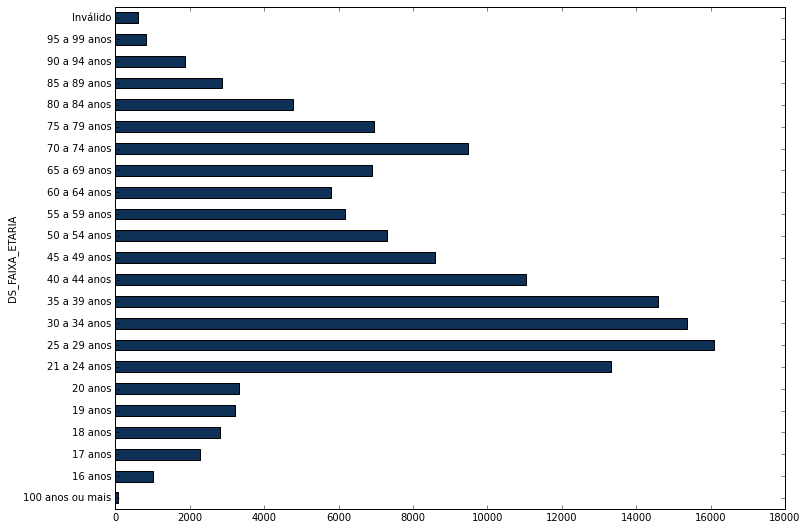

In [22]:

varturno = 1
varmun1 = 'São josé dos Campos'.upper()
varanalise = 'QT_ABSTENCAO' #


turno = dadosTurno.query("NR_TURNO == @varturno")#
turnoCidade = turno.query("NM_MUNICIPIO ==@varmun1")#
turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')#
Grupos = turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index()

**Agrupamento das faixas etárias por jovens até 29 anos, adultos e idosos**

In [23]:
jovens = Grupos[1:9]
adultos = Grupos[9:14]
Idosos = Grupos[14:22]

In [24]:
colunas = ['Abstenção']
index = [ 'Idosos a partir dos 60','Adultos', 'Jovens até 29 anos'] 
data = [Idosos.sum()+(int(Grupos[0:1])),adultos.sum(),jovens.sum()]
grupos = pd.DataFrame(data=data, index=index, columns=colunas)
grupos

,Abstenção
Idosos a partir dos 60,39488
Adultos,47687
Jovens até 29 anos,57418


## Comparação do primeiro turno entre cidades
Alterações possíveis:
- Turno: varturno = 1 ou varturno = 2
- Cidade 1: varmun1 = 'Digite_a_cidade'
- Cidade 2: varmun2 = 'Digite_a_cidade'
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'

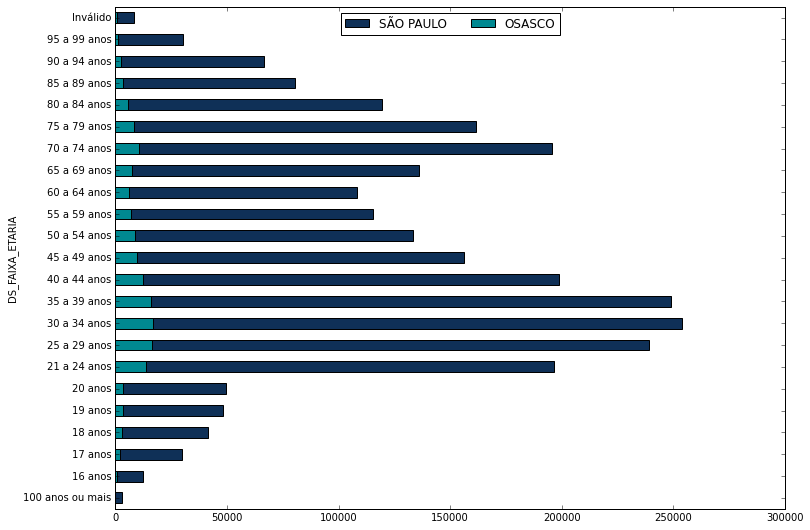

In [26]:
varturno = 1
varmun1 = 'São Paulo'.upper()
varmun2 = 'OsaScO'.upper()
varanalise = 'QT_ABSTENCAO'

turno = dadosTurno.query("NR_TURNO == @varturno")#
turnoCidade = turno.query("NM_MUNICIPIO == @varmun1")#
turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#0f3057')#

turno = dadosTurno.query("NR_TURNO == @varturno")
turnoCidade = turno.query("NM_MUNICIPIO == @varmun2")#
turnoCidade.groupby('DS_FAIXA_ETARIA')[varanalise].sum().sort_index().plot(kind='barh', figsize=(12,9),color = '#008891')#
mtpy.legend([varmun1, varmun2], loc='upper center', ncol = 4)

## Maiores abstenções e comparecimentos do estado
Alterações possíveis:
- Turno: varturno = 1 ou varturno = 2
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'

In [37]:
varturno = 1
varanalise = 'QT_ABSTENCAO'

y = dadosTurno.query("NR_TURNO == @varturno")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nlargest(5)#

NM_MUNICIPIO
SÃO PAULO                2632592
CAMPINAS                  260149
GUARULHOS                 172116
SÃO BERNARDO DO CAMPO     165087
SANTO ANDRÉ               164255
Name: QT_ABSTENCAO, dtype: int64

<AxesSubplot:ylabel='NM_MUNICIPIO'>

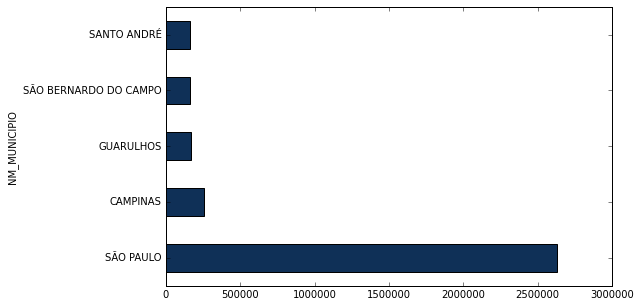

In [36]:
varturno = 1
varanalise = 'QT_ABSTENCAO'

y = dadosTurno.query("NR_TURNO ==@varturno")
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nlargest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')#

## Menores abstenções e comparecimentos do estado
Alterações possíveis:

- Turno: varturno = 1 ou varturno = 2
- Comparecimento: varanalise = 'QT_COMPARECIMENTO'
- Abstenção: varanalise = 'QT_ABSTENCAO'

In [38]:
varturno = 1
varanalise = 'QT_ABSTENCAO'


y = dadosTurno.query("NR_TURNO == @varturno")#
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nsmallest(5)#

NM_MUNICIPIO
NOVA CASTILHO          104
BORÁ                   131
SÃO JOÃO DE IRACEMA    134
PRACINHA               139
URU                    147
Name: QT_ABSTENCAO, dtype: int64

<AxesSubplot:ylabel='NM_MUNICIPIO'>

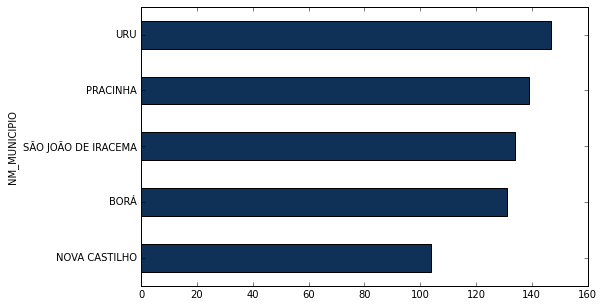

In [39]:
varturno = 1
varanalise = 'QT_ABSTENCAO'



y = dadosTurno.query("NR_TURNO ==@varturno")#
y2 =y.query("SG_UF =='SP'")
y2.groupby('NM_MUNICIPIO')[varanalise].sum().sort_values().nsmallest(5).plot(kind='barh', figsize=(8,5),color = '#0f3057')#